In [77]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\prashu\Downloads\energy_dataset1.csv")
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,49.0,196.0,0.0,6378.0,17,NaN,6436,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,50.0,195.0,0.0,5890.0,16,NaN,5856,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,50.0,196.0,0.0,5461.0,8,NaN,5454,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,50.0,191.0,0.0,5238.0,2,NaN,5151,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,42.0,189.0,0.0,4935.0,9,NaN,4861,20264.0,38.41,56.04


In [3]:
df.shape

(35064, 28)

## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [5]:
df['generation geothermal'].value_counts()

generation geothermal
0.0    35046
Name: count, dtype: int64

In [6]:
df['generation fossil peat'].value_counts()

generation fossil peat
0.0    35046
Name: count, dtype: int64

In [7]:
df['generation fossil oil shale'].value_counts()

generation fossil oil shale
0.0    35046
Name: count, dtype: int64

In [8]:
df.isna().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [9]:
df.drop(['generation wind offshore','generation marine','generation hydro pumped storage aggregated','generation fossil coal-derived gas','generation geothermal','forecast wind offshore eday ahead','generation fossil peat','generation fossil oil shale'],axis=1,inplace=True)

In [10]:
df.fillna(method='ffill',inplace=True)

C:\Users\prashu\AppData\Local\Temp\ipykernel_23348\4116506308.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True)


In [11]:
df.isna().sum()

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
forecast solar day ahead                       0
forecast wind onshore day ahead                0
total load actual                              0
price day ahead                                0
price actual                                   0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df['time']=pd.to_datetime(df['time'],utc=True)
df['month']=df['time'].dt.month
df['dayofweek']=df['time'].dt.dayofweek
df['hour']=df['time'].dt.hour

In [14]:
numeric_cols=['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load actual', 'price day ahead', 'price actual']

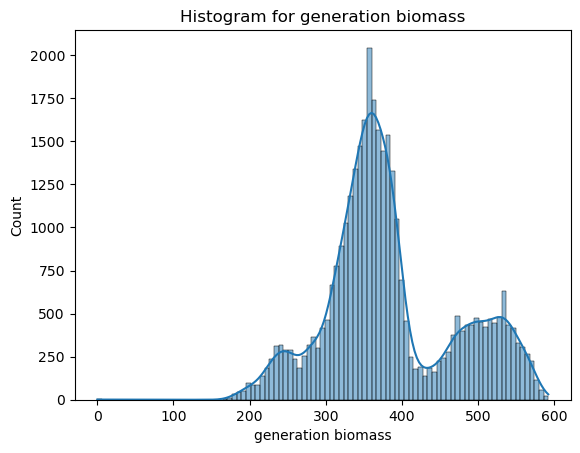

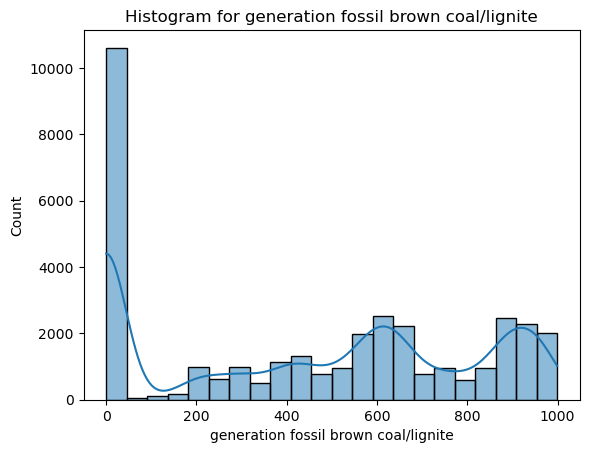

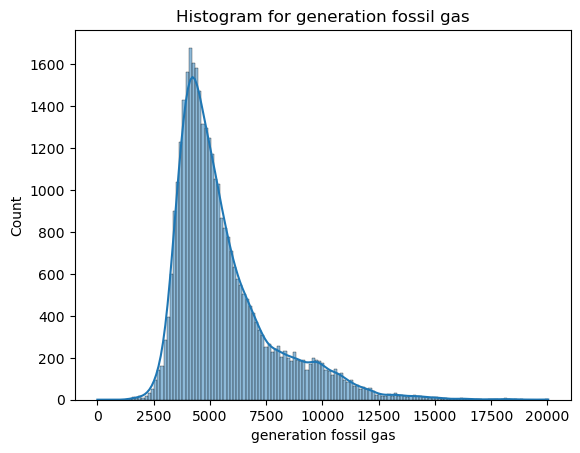

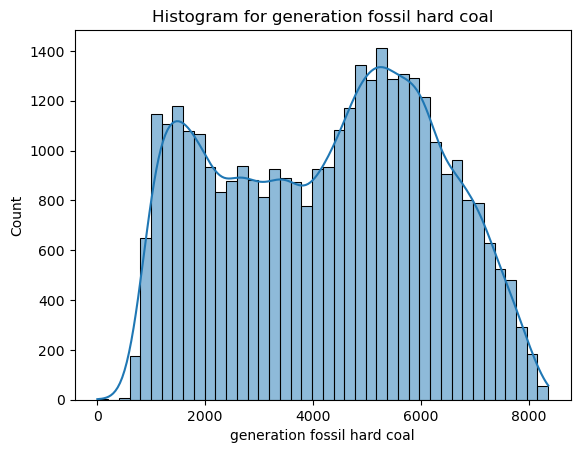

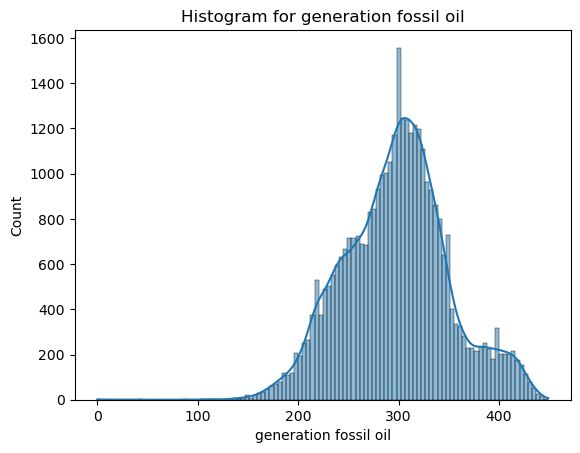

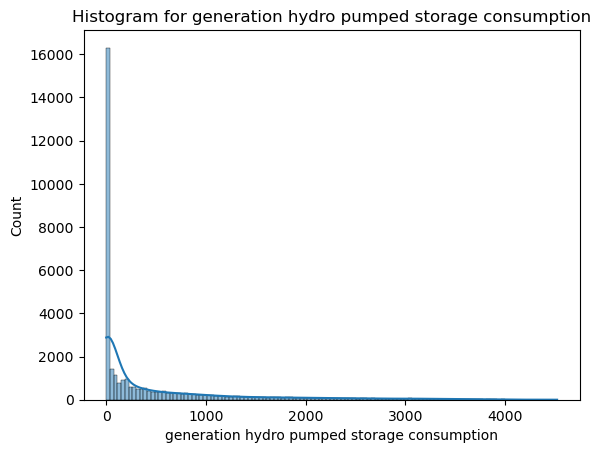

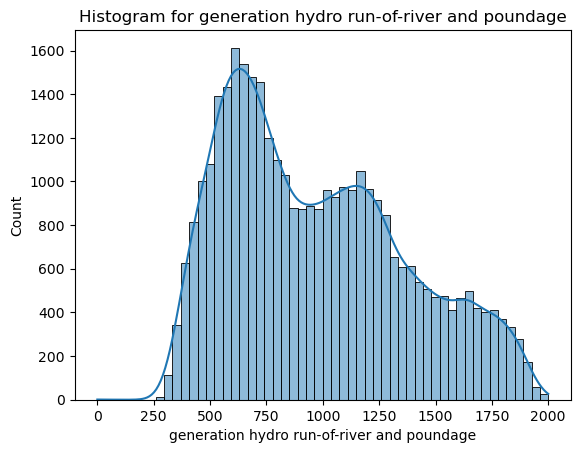

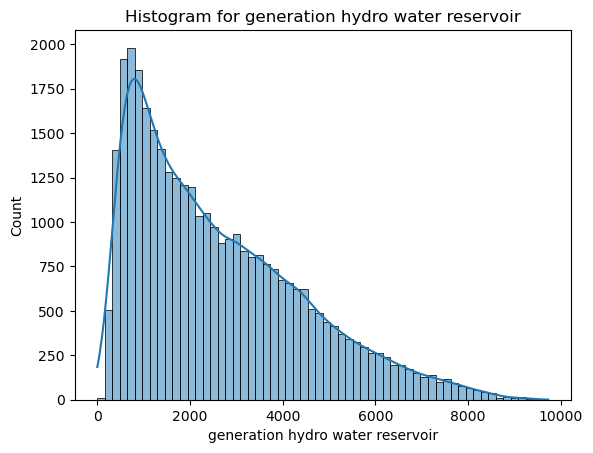

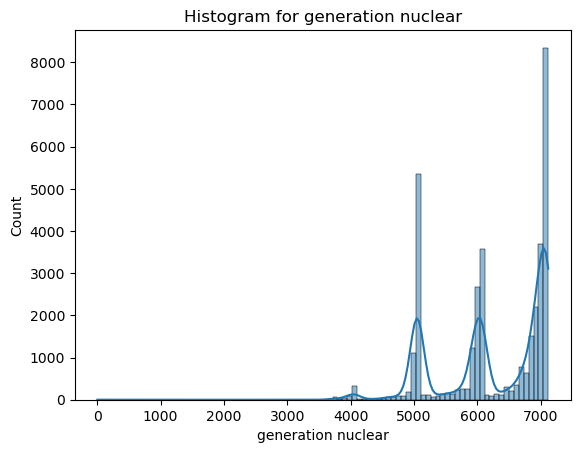

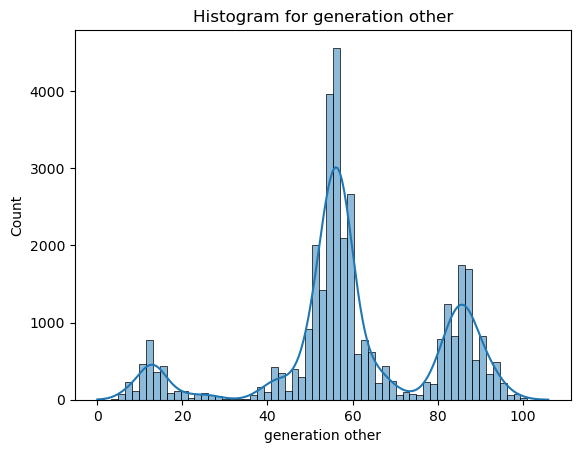

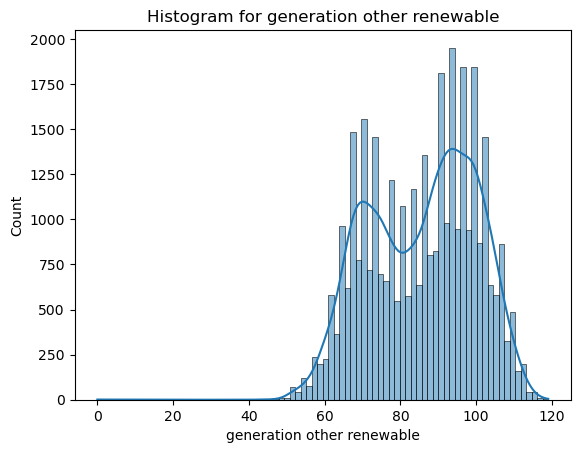

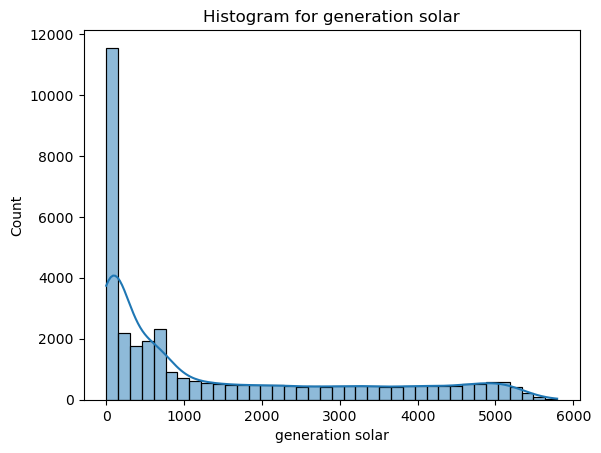

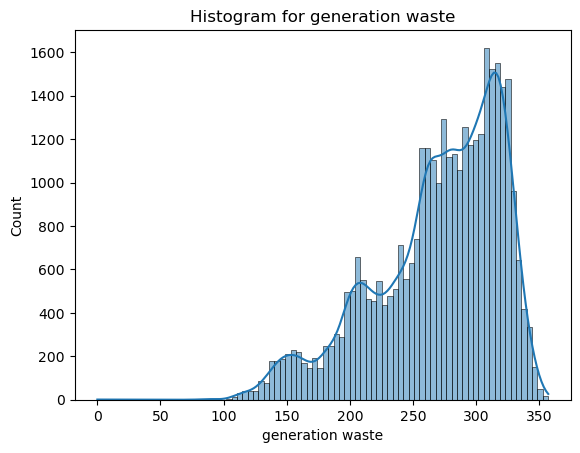

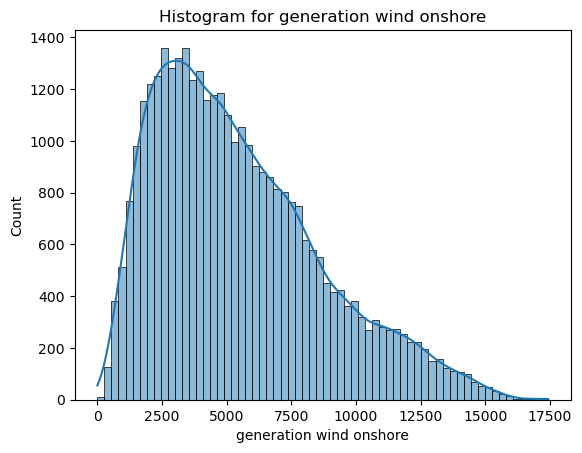

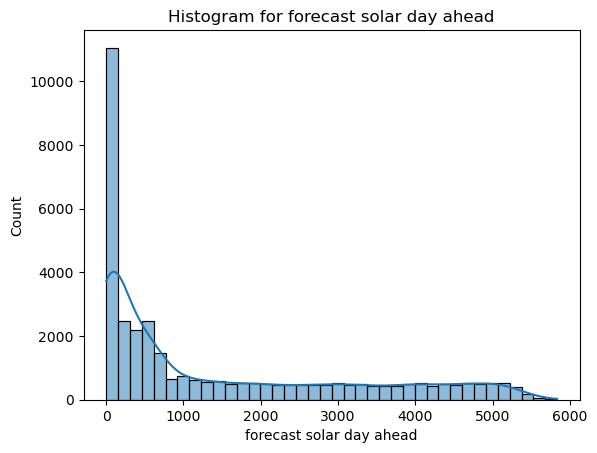

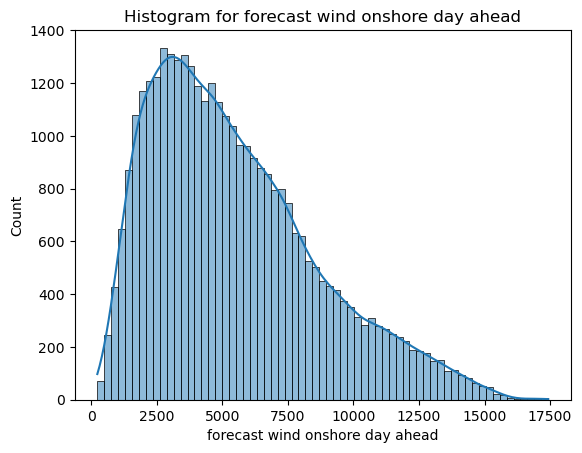

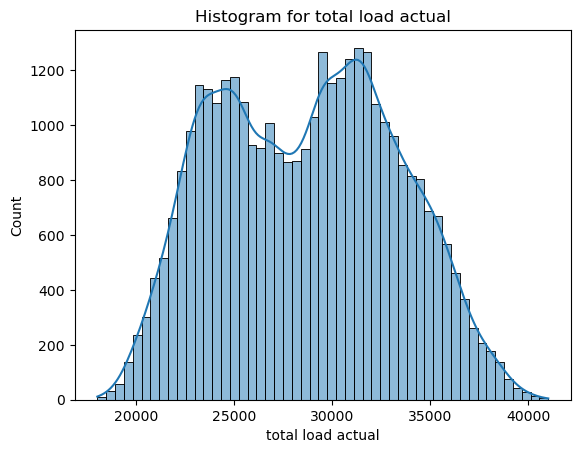

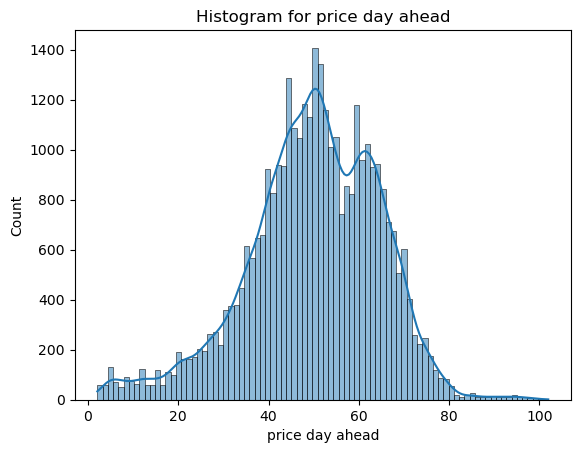

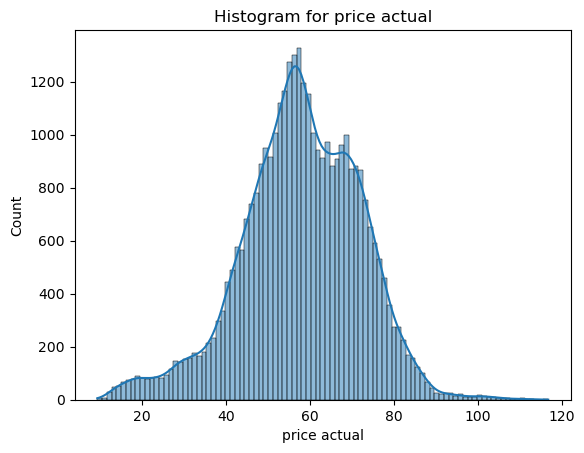

In [15]:
for col in numeric_cols:
    sns.histplot(df[col],kde=True)
    plt.title(f"Histogram for {col}")
    plt.show()

<Figure size 2000x800 with 0 Axes>

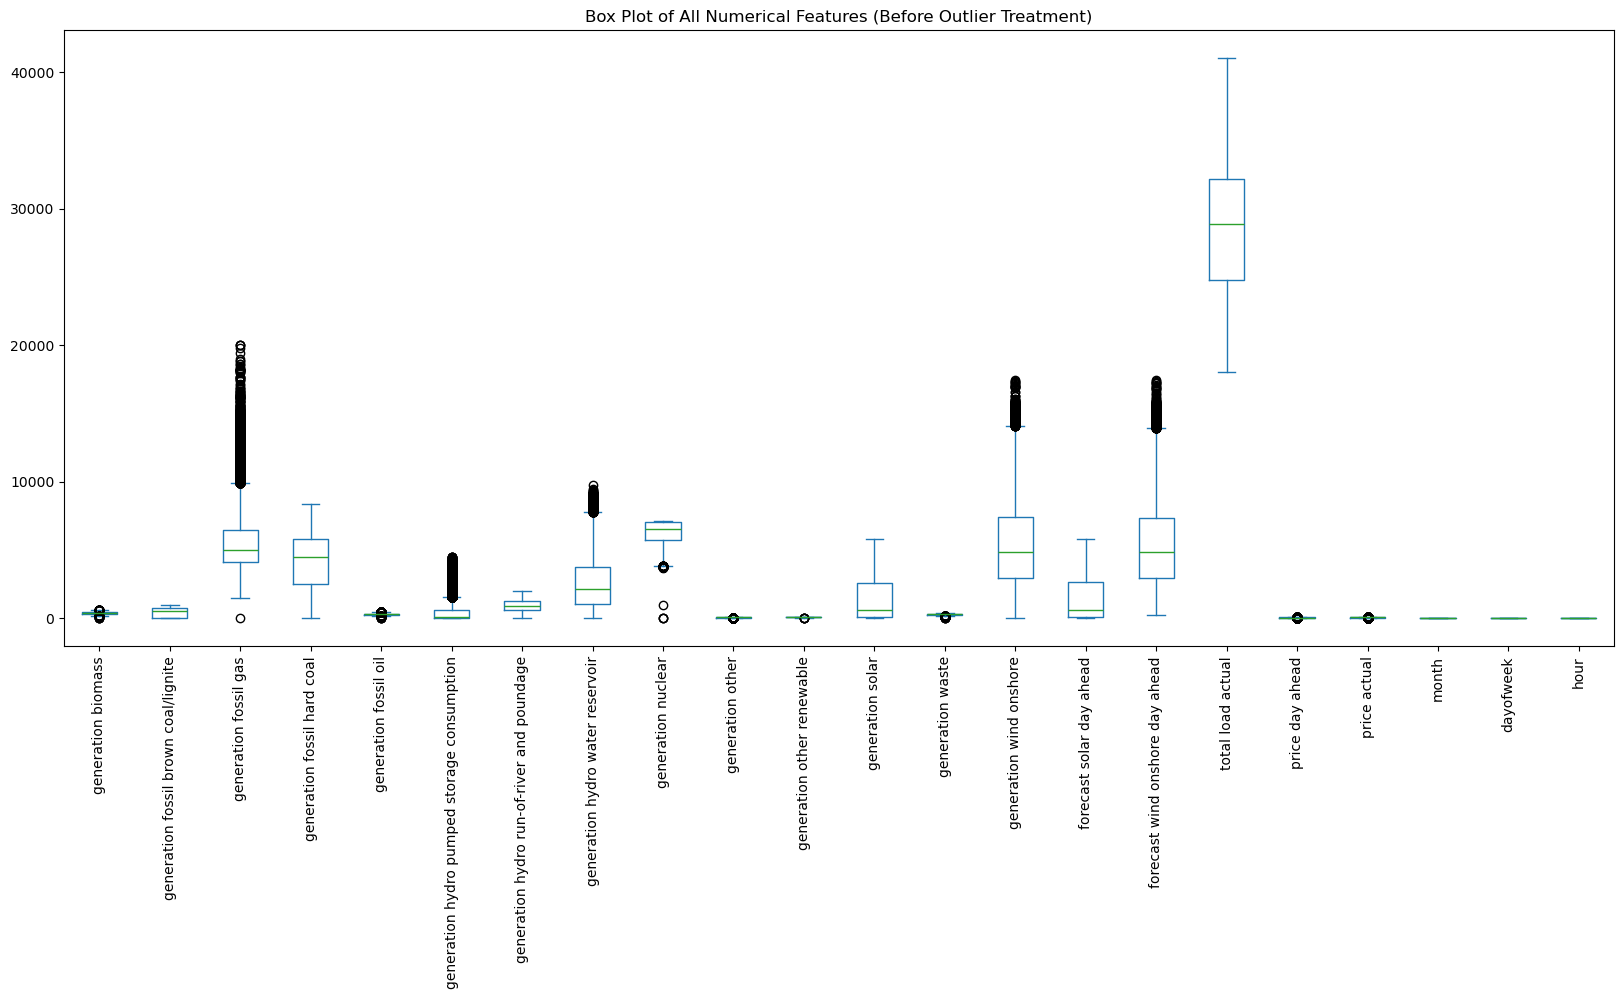

In [16]:
plt.figure(figsize=(20,8))
df.plot(kind='box', figsize=(20,8))
plt.title('Box Plot of All Numerical Features (Before Outlier Treatment)')
plt.xticks(rotation = 90)
plt.show()

In [17]:
from feature_engine.outliers import Winsorizer
win=Winsorizer(capping_method='iqr',tail='both')
df_cleaned = win.fit_transform(df)

In [18]:
df_cleaned

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load actual,price day ahead,price actual,month,dayofweek,hour
0,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.5,863.0,1051.0,1899.0,7096.0,...,196.0,6378.0,17,6436,25385.0,50.10,65.41,12,2,23
1,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,162.5,920.0,1009.0,1658.0,7096.0,...,195.0,5890.0,16,5856,24382.0,48.10,64.92,1,3,0
2,2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,162.5,1164.0,973.0,1371.0,7099.0,...,196.0,5461.0,8,5454,22734.0,47.33,64.48,1,3,1
3,2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,162.5,1503.0,949.0,779.0,7098.0,...,191.0,5238.0,2,5151,21286.0,42.27,59.32,1,3,2
4,2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,162.5,1540.0,953.0,720.0,7097.0,...,189.0,4935.0,9,4861,20264.0,38.41,56.04,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 18:00:00+00:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,...,277.0,3113.0,96,3253,30653.0,68.85,77.02,12,0,18
35060,2018-12-31 19:00:00+00:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,...,280.0,3288.0,51,3353,29735.0,68.40,76.16,12,0,19
35061,2018-12-31 20:00:00+00:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,...,286.0,3503.0,36,3404,28071.0,66.88,74.30,12,0,20
35062,2018-12-31 21:00:00+00:00,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,...,287.0,3586.0,29,3273,25801.0,63.93,69.89,12,0,21


<Figure size 2000x800 with 0 Axes>

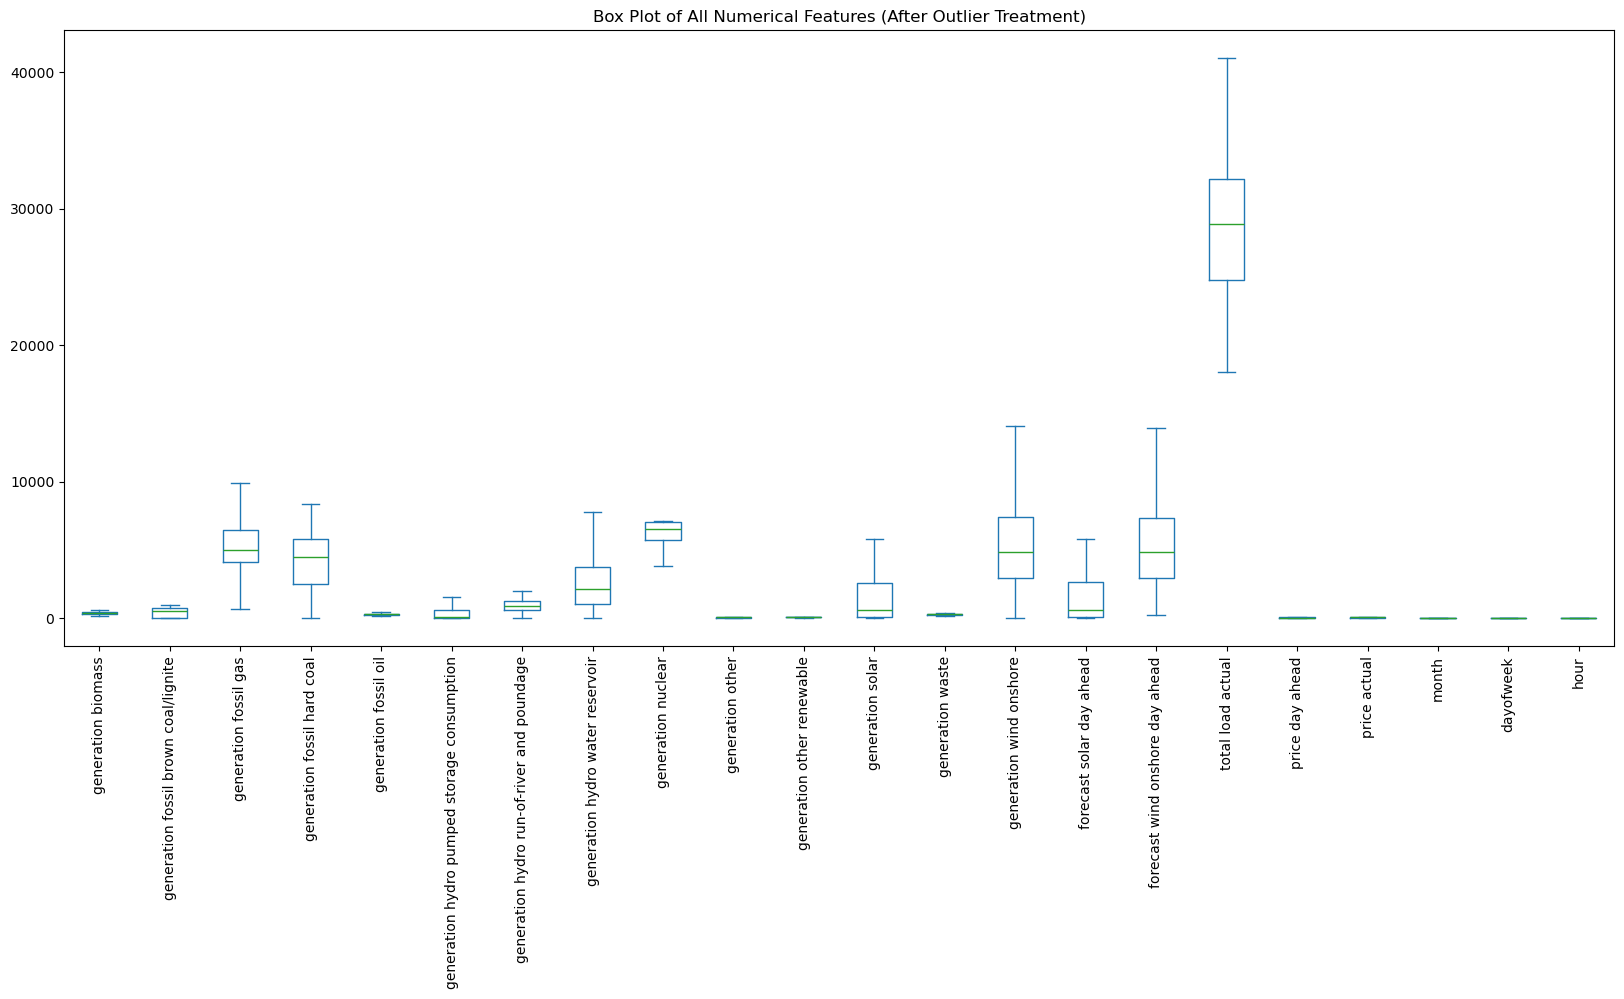

In [19]:
plt.figure(figsize=(20,8))
df_cleaned.plot(kind='box', figsize=(20,8))
plt.title('Box Plot of All Numerical Features (After Outlier Treatment)')
plt.xticks(rotation = 90)
plt.show()

In [20]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35064 non-null  datetime64[ns, UTC]
 1   generation biomass                           35064 non-null  float64            
 2   generation fossil brown coal/lignite         35064 non-null  float64            
 3   generation fossil gas                        35064 non-null  float64            
 4   generation fossil hard coal                  35064 non-null  float64            
 5   generation fossil oil                        35064 non-null  float64            
 6   generation hydro pumped storage consumption  35064 non-null  float64            
 7   generation hydro run-of-river and poundage   35064 non-null  float64            
 8   generation hydro water res

In [21]:
df_cleaned.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load actual,price day ahead,price actual,month,dayofweek,hour
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,...,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,383.557324,448.091918,5519.443717,4256.550622,298.383812,380.290583,972.206337,2600.734796,6264.119867,60.316578,...,269.547114,5456.701981,1439.066735,5461.106434,28697.608573,49.969280,57.932878,6.522930,3.002110,11.500000
std,85.246335,354.616732,1900.400911,1961.973297,52.267702,534.856950,400.714694,1820.551123,837.560157,20.012861,...,49.831573,3189.260875,1677.703355,3147.066298,4575.872425,14.270205,13.939157,3.448752,2.000484,6.922285
min,183.000000,0.000000,671.500000,0.000000,162.500000,0.000000,0.000000,0.000000,3860.000000,12.500000,...,135.000000,0.000000,0.000000,237.000000,18041.000000,12.930000,21.353750,1.000000,0.000000,0.000000
25%,333.000000,0.000000,4126.000000,2527.000000,263.000000,0.000000,637.000000,1078.000000,5759.000000,53.000000,...,240.000000,2933.000000,69.000000,2979.000000,24806.750000,41.490000,49.347500,4.000000,1.000000,5.750000
50%,367.000000,509.000000,4969.500000,4475.000000,300.000000,68.000000,906.000000,2165.000000,6564.000000,57.000000,...,279.000000,4849.000000,576.000000,4855.000000,28902.000000,50.520000,58.020000,7.000000,3.000000,11.500000
75%,433.000000,757.000000,6429.000000,5839.000000,330.000000,616.000000,1250.000000,3757.250000,7025.000000,80.000000,...,310.000000,7399.500000,2636.000000,7353.000000,32194.250000,60.530000,68.010000,10.000000,5.000000,17.250000
max,583.000000,999.000000,9883.500000,8359.000000,430.500000,1540.000000,2000.000000,7776.125000,7117.000000,106.000000,...,357.000000,14099.250000,5836.000000,13914.000000,41015.000000,89.090000,96.003750,12.000000,6.000000,23.000000


In [22]:
df_cleaned.drop('time',axis=1,inplace=True)

In [23]:
df_cleaned.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load actual', 'price day ahead', 'price actual', 'month',
       'dayofweek', 'hour'],
      dtype='object')

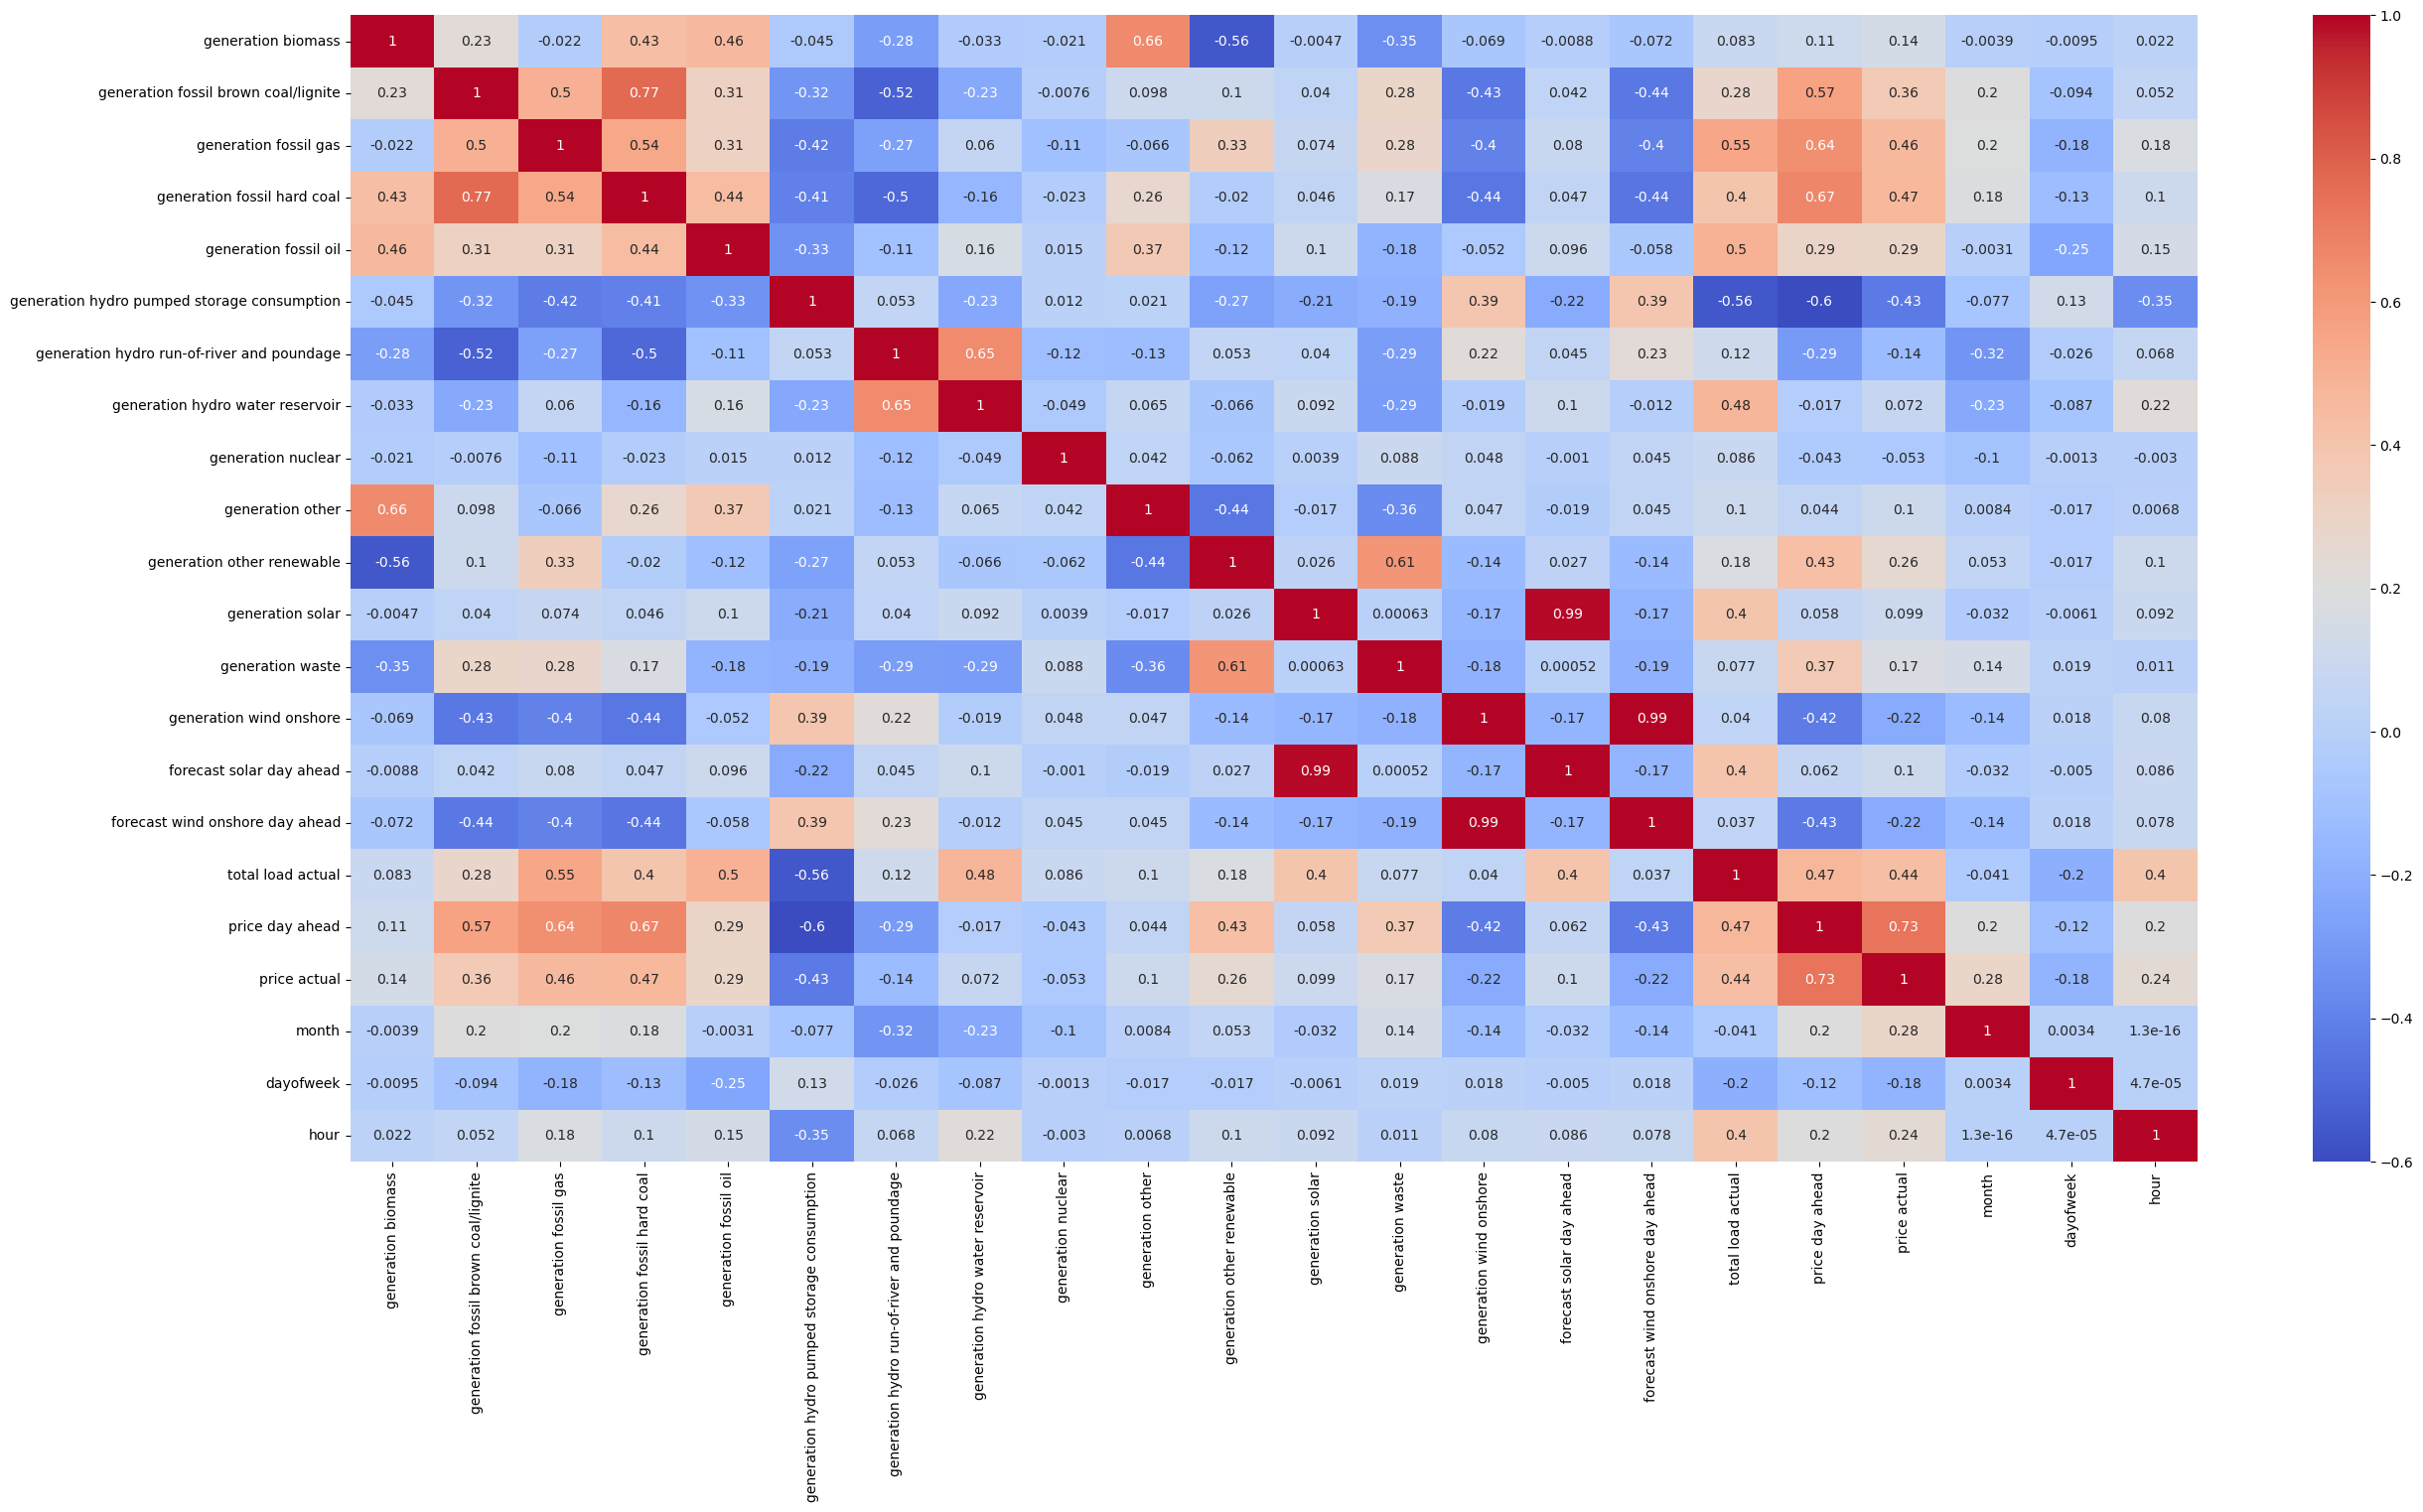

In [24]:
plt.figure(figsize=(30,15))
sns.heatmap(df[['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load actual', 'price day ahead', 'price actual', 'month',
       'dayofweek', 'hour']].corr(),annot=True,cmap='coolwarm')
plt.show()

In [27]:
df_cleaned.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load actual', 'price day ahead', 'price actual', 'month',
       'dayofweek', 'hour'],
      dtype='object')

In [31]:
df_cleaned.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load actual,price day ahead,price actual,month,dayofweek,hour
0,447.0,329.0,4844.0,4821.0,162.5,863.0,1051.0,1899.0,7096.0,43.0,...,196.0,6378.0,17,6436,25385.0,50.10,65.41,12,2,23
1,449.0,328.0,5196.0,4755.0,162.5,920.0,1009.0,1658.0,7096.0,43.0,...,195.0,5890.0,16,5856,24382.0,48.10,64.92,1,3,0
2,448.0,323.0,4857.0,4581.0,162.5,1164.0,973.0,1371.0,7099.0,43.0,...,196.0,5461.0,8,5454,22734.0,47.33,64.48,1,3,1
3,438.0,254.0,4314.0,4131.0,162.5,1503.0,949.0,779.0,7098.0,43.0,...,191.0,5238.0,2,5151,21286.0,42.27,59.32,1,3,2
4,428.0,187.0,4130.0,3840.0,162.5,1540.0,953.0,720.0,7097.0,43.0,...,189.0,4935.0,9,4861,20264.0,38.41,56.04,1,3,3


## Feature Scaling 

In [33]:
x=df_cleaned.drop(['total load actual'],axis=1)
y=df_cleaned['total load actual']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=29)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

## Feature Selection

In [37]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

In [39]:
f_selector = SelectKBest(score_func=f_regression, k='all')
f_selector.fit(x_train_scaled, y_train)
f_scores = pd.Series(f_selector.scores_, index=x.columns)
print("F-regression scores:\n", f_scores.sort_values(ascending=False))

F-regression scores:
 generation hydro pumped storage consumption    17008.318582
generation fossil gas                          13183.752596
generation fossil oil                           9184.465527
generation hydro water reservoir                8531.412368
price day ahead                                 7958.499046
price actual                                    6506.693637
forecast solar day ahead                        5547.483834
hour                                            5378.640260
generation solar                                5273.077734
generation fossil hard coal                     5118.837788
generation fossil brown coal/lignite            2280.548106
dayofweek                                       1206.248155
generation other renewable                       934.357181
generation hydro run-of-river and poundage       417.323877
generation other                                 282.475606
generation nuclear                               215.165521
generation biomass

In [41]:
mi= SelectKBest(score_func=mutual_info_regression, k='all')
mi.fit(x_train_scaled, y_train)
mi = pd.Series(mi.scores_, index=x.columns)
print("\nMutual Information scores:\n", mi.sort_values(ascending=False))


Mutual Information scores:
 hour                                           0.459099
generation hydro pumped storage consumption    0.312231
generation fossil gas                          0.223901
generation fossil oil                          0.188682
generation hydro water reservoir               0.182091
price day ahead                                0.163706
forecast solar day ahead                       0.151636
generation solar                               0.136820
price actual                                   0.134251
generation fossil hard coal                    0.121537
generation fossil brown coal/lignite           0.101993
generation nuclear                             0.098884
generation other                               0.097489
generation hydro run-of-river and poundage     0.071031
dayofweek                                      0.049762
month                                          0.046162
generation biomass                             0.044218
generation waste   

## Model Building & Evaluation

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV

In [45]:
rf = RandomForestRegressor(n_estimators=100, random_state=29)
rf.fit(x_train_scaled, y_train)
y_pred = rf.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)

Mean Absolute Error: 678.2836004562955
R² Score: 0.9603486477513437


In [ ]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'max_features': ['sqrt', 'log2', None]  
# }

# grid_search = GridSearchCV(
#     estimator=model,
#     param_grid=param_grid,
#     scoring='r2',
#     cv=5,
#     n_jobs=-1,
#     verbose=2
# )
# grid_search.fit(x_train_scaled, y_train)

In [49]:
knn = KNeighborsRegressor()
knn.fit(x_train_scaled, y_train)
y_pred = knn.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)

Mean Absolute Error: 848.285327249394
R² Score: 0.9415974479206959


In [53]:
lr=LinearRegression()
lr.fit(x_train_scaled,y_train)
y_pred=lr.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)

Mean Absolute Error: 1035.9330772794362
R² Score: 0.916939614982035


In [55]:
dt=DecisionTreeRegressor(random_state=29)
dt.fit(x_train_scaled,y_train)
y_pred=dt.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)

Mean Absolute Error: 1043.4321973477827
R² Score: 0.8940798497171252


In [87]:
xgb= XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(x_train_scaled, y_train)
y_pred = xgb.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)

Mean Absolute Error: 664.5188686969735
R² Score: 0.9647726021064158


In [67]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

grid = GridSearchCV(estimator=xgb, param_grid=param_grid,
                    scoring='neg_mean_absolute_error', cv=5, verbose=1, n_jobs=-1)

grid.fit(x_train_scaled, y_train)
best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)

print("Best Parameters:", grid.best_params_)
print(f"MAE after tuning: {mae:.2f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
✅ Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}
📉 MAE after tuning: 5879.95


## Predicting Manual Input

In [174]:
manual_input = [[10, 100, 150, 80, 200, 50, 70, 20, 5, 60, 75, 14, 2, 6, 90, 120, 45, 33, 28, 60, 11]]
user_scaled = scaler.transform(manual_input)
predicted_load = xgb.predict(user_scaled)[0]
print(f"Predicted Load: {predicted_load:.2f} MW")

Predicted Load: 26426.42 MW


## Demand pattern throughout the day

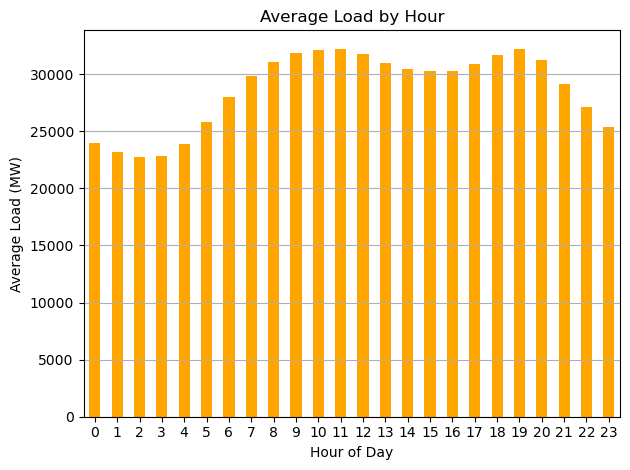

In [265]:
df.groupby('hour')['total load actual'].mean().plot(kind='bar', color='orange')
plt.title("Average Load by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Load (MW)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Weekday vs weekend consumption

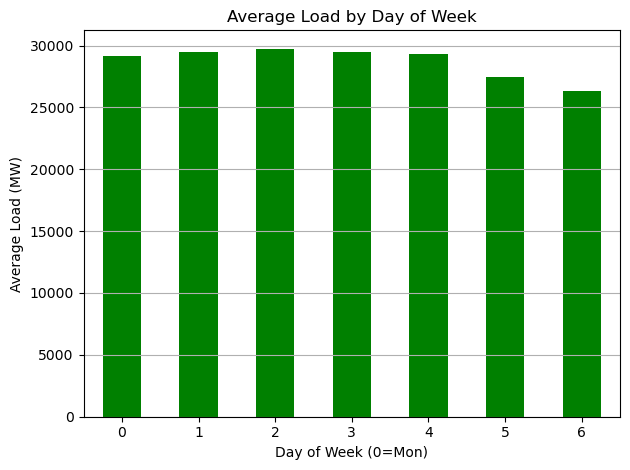

In [261]:
df.groupby('dayofweek')['total load actual'].mean().plot(kind='bar', color='green')
plt.title("Average Load by Day of Week")
plt.xlabel("Day of Week (0=Mon)")
plt.ylabel("Average Load (MW)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Unsupervised ML

In [ ]:
df_pred = X.copy()
df_pred['predicted_load'] = model.predict(X_scaled)

In [176]:
clustering_features = ['predicted_load', 'generation solar', 'generation wind onshore',
    'price day ahead', 'hour', 'dayofweek']

In [178]:
clustering_input = df_pred[clustering_features]

scaler_cluster = StandardScaler()
clustering_scaled = scaler_cluster.fit_transform(clustering_input)

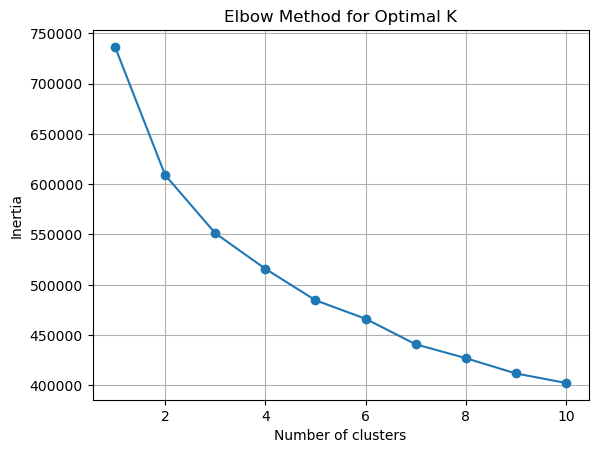

In [210]:
from sklearn.cluster import KMeans
inertia=[]
for k in range(1,11):
    km=KMeans(n_clusters=k,random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figure=(8,5))
plt.plot(range(1,11),inertia,marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [190]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(clustering_scaled)
df_pred['cluster'] = cluster_labels

In [182]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(clustering_scaled)
user_cluster = kmeans.predict(scaler_cluster.transform([[predicted_load, 1200, 800, 55, 14, 3]]))[0]

In [267]:

cluster_summary = df_pred.groupby('cluster').agg({
    'predicted_load': 'mean',
    'price day ahead': 'mean',
    'generation solar': 'mean',
    'generation wind onshore': 'mean',
    'generation nuclear': 'mean',
    'generation fossil gas': 'mean'
}).rename(columns={
    'predicted_load': 'Avg Load (MW)',
    'price day ahead': 'Avg Price',
    'generation solar': 'Solar',
    'generation wind onshore': 'Wind',
    'generation nuclear': 'Nuclear',
    'generation fossil gas': 'Gas'
}).reset_index()

sorted_clusters = cluster_summary.sort_values(by="Avg Load (MW)").reset_index(drop=True)
cluster_roles = {}
cluster_roles[sorted_clusters.loc[0, "cluster"]] = {
        "Type": "Off-Peak",
        "Description": "Low demand period. Great for cost-efficient operations.",
        "Suggestions": [
            "Encourage EV charging and industrial ramp-up.",
            "Store surplus renewable energy.",
            "Run maintenance or auxiliary operations."
        ]
    }
cluster_roles[sorted_clusters.loc[1, "cluster"]]  = {
        "Type": " Shift Candidate",
        "Description": "Moderate load. Ideal for balancing or shifting demand from peak periods.",
        "Suggestions": [
            "Shift HVAC, EV, or flexible processes here.",
            "Encourage smart scheduling of tasks.",
            "Use this window to optimize grid flexibility."
        ]
    }
cluster_roles[sorted_clusters.loc[2, "cluster"]]  = {
        "Type": "Peak Load",
        "Description": "High demand with costly grid pressure. May require battery backup or demand reduction.",
        "Suggestions": [
            "Avoid EV charging and non-essential loads.",
            "Activate battery reserves if available.",
            "Send alerts to high-consumption consumers."
        ]
    }

print(pd.DataFrame(cluster_summary))
print(f"Predicted load belongs to cluster: {user_cluster} ({cluster_roles[user_cluster]['Type']}- {cluster_roles[user_cluster]['Description']}-{cluster_roles[user_cluster]['Suggestions']})")


   cluster  Avg Load (MW)  Avg Price        Solar         Wind      Nuclear  \
0        0   30499.380859  53.205258   614.299346  6533.946371  6271.606206   
1        1   23969.626953  42.573800   348.146419  5455.298518  6255.035584   
2        2   31439.132812  53.809832  3637.316517  4090.954320  6264.380698   

           Gas  
0  5810.162522  
1  4615.399769  
2  6122.008535  
Predicted load belongs to cluster: 0 ( Shift Candidate- Moderate load. Ideal for balancing or shifting demand from peak periods.-['Shift HVAC, EV, or flexible processes here.', 'Encourage smart scheduling of tasks.', 'Use this window to optimize grid flexibility.'])


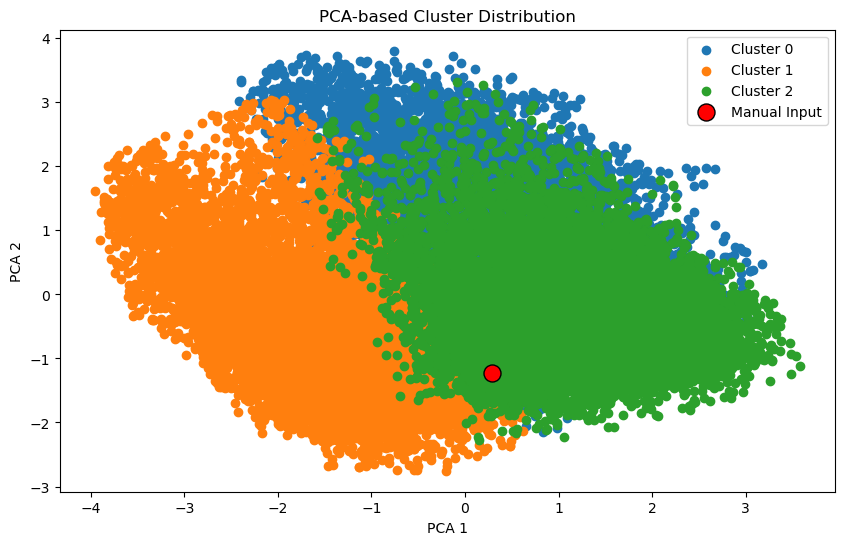

In [218]:

plt.figure(figsize=(10, 6))
for i in range(3):
    ix = np.where(cluster_labels == i)
    plt.scatter(pca_result[ix, 0], pca_result[ix, 1], label=f"Cluster {i}")
user_pca = pca.transform(scaler_cluster.transform([[predicted_load, 1200, 800, 55, 14, 3]]))
plt.scatter(user_pca[:, 0], user_pca[:, 1], c='red', edgecolors='black', s=150, label='Manual Input')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA-based Cluster Distribution")
plt.legend()
plt.show()

## Cluster Count Distribution - How many records fall into each cluster

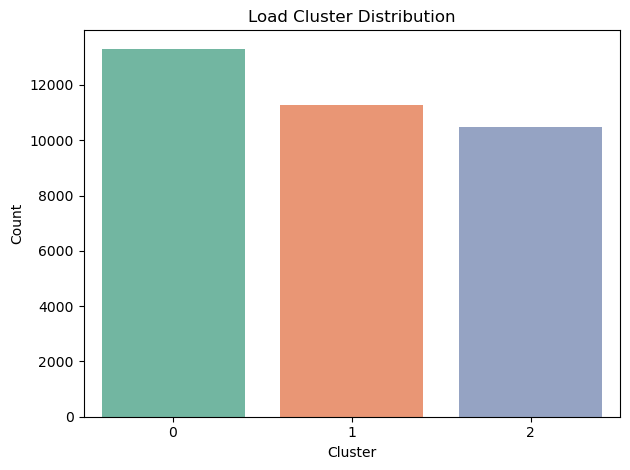

In [247]:
sns.countplot(x='cluster', data=df_pred, palette='Set2')
plt.title("Load Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Cluster-wise Avg Load Comparison - Interpret clusters by average load


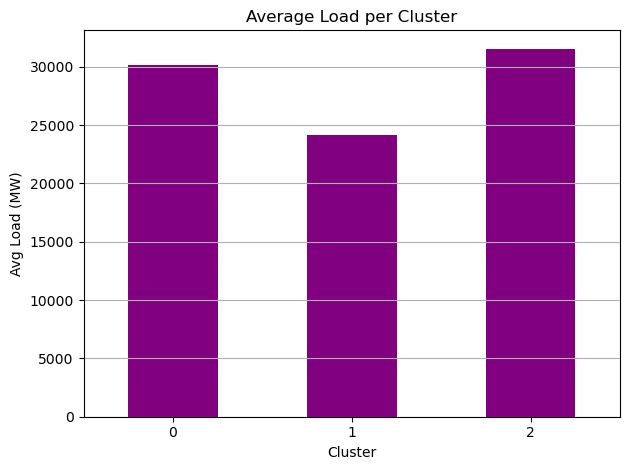

In [250]:
df.groupby('load_cluster')['total load actual'].mean().plot(kind='bar', color='purple')
plt.title("Average Load per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Avg Load (MW)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Energy Load Clusters by Hour

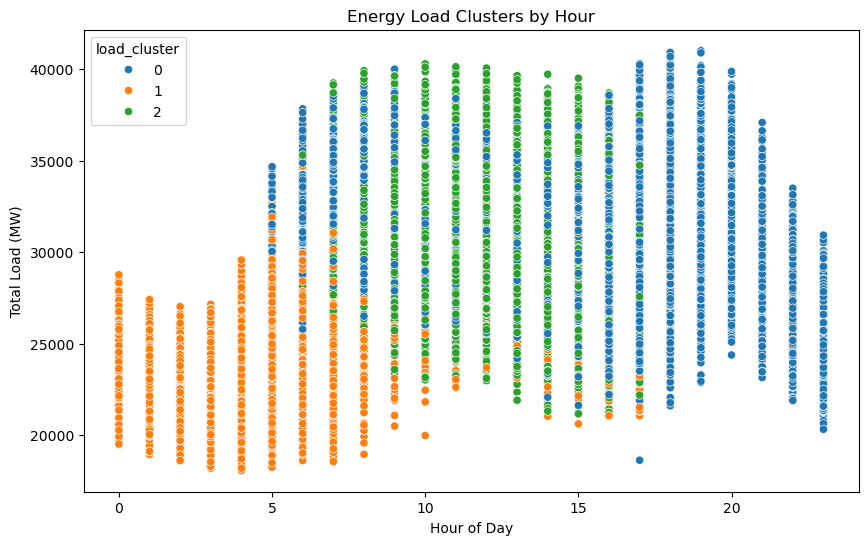

In [253]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(x='hour',y='total load actual',hue='load_cluster',data=df,palette='tab10')
plt.title('Energy Load Clusters by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Load (MW)')
plt.show()